<a href="https://colab.research.google.com/github/V-Gopi-Kiran/Gopi-Kiran/blob/main/pomegranate_sorting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the libraries

In [ ]:
from skimage.feature import graycomatrix, graycoprops
from google.colab.patches import cv2_imshow
from skimage.measure import shannon_entropy
from skimage import io, color
from PIL import Image
import pandas as pd
import numpy as np
import math
import pywt
import glob
import cv2
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


#KNN Classifier

In [ ]:
def knnmodel(dataset ,k):
  from sklearn.preprocessing import StandardScaler
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
  from sklearn.model_selection import train_test_split

  X = dataset.drop('Folder Name', axis=1)  # Features
  y = dataset['Folder Name']  # Target variable
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  knn_Classifier = KNeighborsClassifier(n_neighbors=k)
  knn_Classifier.fit(X_train,y_train)
  y_prediction = knn_Classifier.predict(X_test)
  #print("Predicted class:", y_prediction)

  # Accuracy
  Accuracy = accuracy_score(y_test,y_prediction)
  percentage =  Accuracy * 100
  print( f"Accuracy : {percentage} % ")

  from sklearn.metrics import classification_report
  report1 = classification_report(y_test, y_prediction)
  print("Classification Report:")
  print(report1)

#SVM Classifier

In [ ]:
def svmmodel(dataset, kernel):
  from sklearn.model_selection import train_test_split
  from sklearn.svm import SVC
  from sklearn.preprocessing import StandardScaler
  from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

  X = dataset.drop('Folder Name', axis=1)  # Features
  y = dataset['Folder Name']  # Target variable
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Standardizing the features (SVMs are sensitive to the scale of input features)
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  svm_classifier = SVC(kernel=kernel, random_state=42)  # You can choose a different kernel if needed
  svm_classifier.fit(X_train, y_train)
  y_prediction_svm = svm_classifier.predict(X_test)
  #print("Predicted class:", y_prediction_svm)

  # Accuracy
  accuracy_svm = accuracy_score(y_test, y_prediction_svm)
  percentage_svm = accuracy_svm * 100
  print(f"SVM Accuracy: {percentage_svm} %")

  from sklearn.metrics import classification_report
  report2 = classification_report(y_test, y_prediction_svm)
  print("Classification Report:")
  print(report2)

#Random Forest Classifier

In [ ]:
def randomforestmodel(dataset, n_estimators):
  from sklearn.model_selection import train_test_split
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

  X = dataset.drop('Folder Name', axis=1)  # Features
  y = dataset['Folder Name']  # Target variable
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Creating a Random Forest classifier
  random_forest_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)  # You can adjust the number of trees (n_estimators)
  random_forest_classifier.fit(X_train, y_train)
  y_prediction_rf = random_forest_classifier.predict(X_test)
  #print("Predicted class:", y_prediction_rf)

  # Accuracy
  accuracy_rf = accuracy_score(y_test, y_prediction_rf)
  percentage_rf = accuracy_rf * 100
  print(f"Random Forest Accuracy: {percentage_rf} %")

  from sklearn.metrics import classification_report
  report3 = classification_report(y_test, y_prediction_rf)
  print("Classification Report:")
  print(report3)

#ANN Classifier

In [ ]:
def annmodel(dataset):
  import tensorflow as tf
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Dense
  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import StandardScaler, LabelEncoder
  from sklearn.metrics import accuracy_score

  X = dataset.drop('Folder Name', axis=1)  # Features
  y = dataset['Folder Name']  # Target variable
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Label Encoding for the target variable
  label_encoder = LabelEncoder()
  y_train_encoded = label_encoder.fit_transform(y_train)
  y_test_encoded = label_encoder.transform(y_test)

  # Standardizing the features
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Convert the labels to one-hot encoding
  y_train_categorical = tf.keras.utils.to_categorical(y_train_encoded)
  y_test_categorical = tf.keras.utils.to_categorical(y_test_encoded)

  # Create a simple ANN model
  model = Sequential()
  model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))  # Input layer
  model.add(Dense(units=32, activation='relu'))  # Hidden layer
  model.add(Dense(units=len(dataset['Folder Name'].unique()), activation='softmax'))  # Output layer

  # Compile the model
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='categorical_crossentropy',  # Assuming multi-class classification
                metrics=['accuracy'])

  # Train the model
  model.fit(X_train_scaled, y_train_categorical, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

  # Make predictions on the test set
  y_probabilities = model.predict(X_test_scaled)
  y_prediction_ann_categorical = np.argmax(y_probabilities, axis=1)

  # Accuracy
  accuracy_ann = accuracy_score(y_test_encoded, y_prediction_ann_categorical)
  percentage_ann = accuracy_ann * 100
  print(f"ANN Accuracy: {percentage_ann} %")

  from sklearn.metrics import classification_report
  report4 = classification_report(y_test_encoded, y_prediction_ann_categorical)
  print("Classification Report:")
  print(report4)

#Preprocessing: Histogram equalization and noise reduction

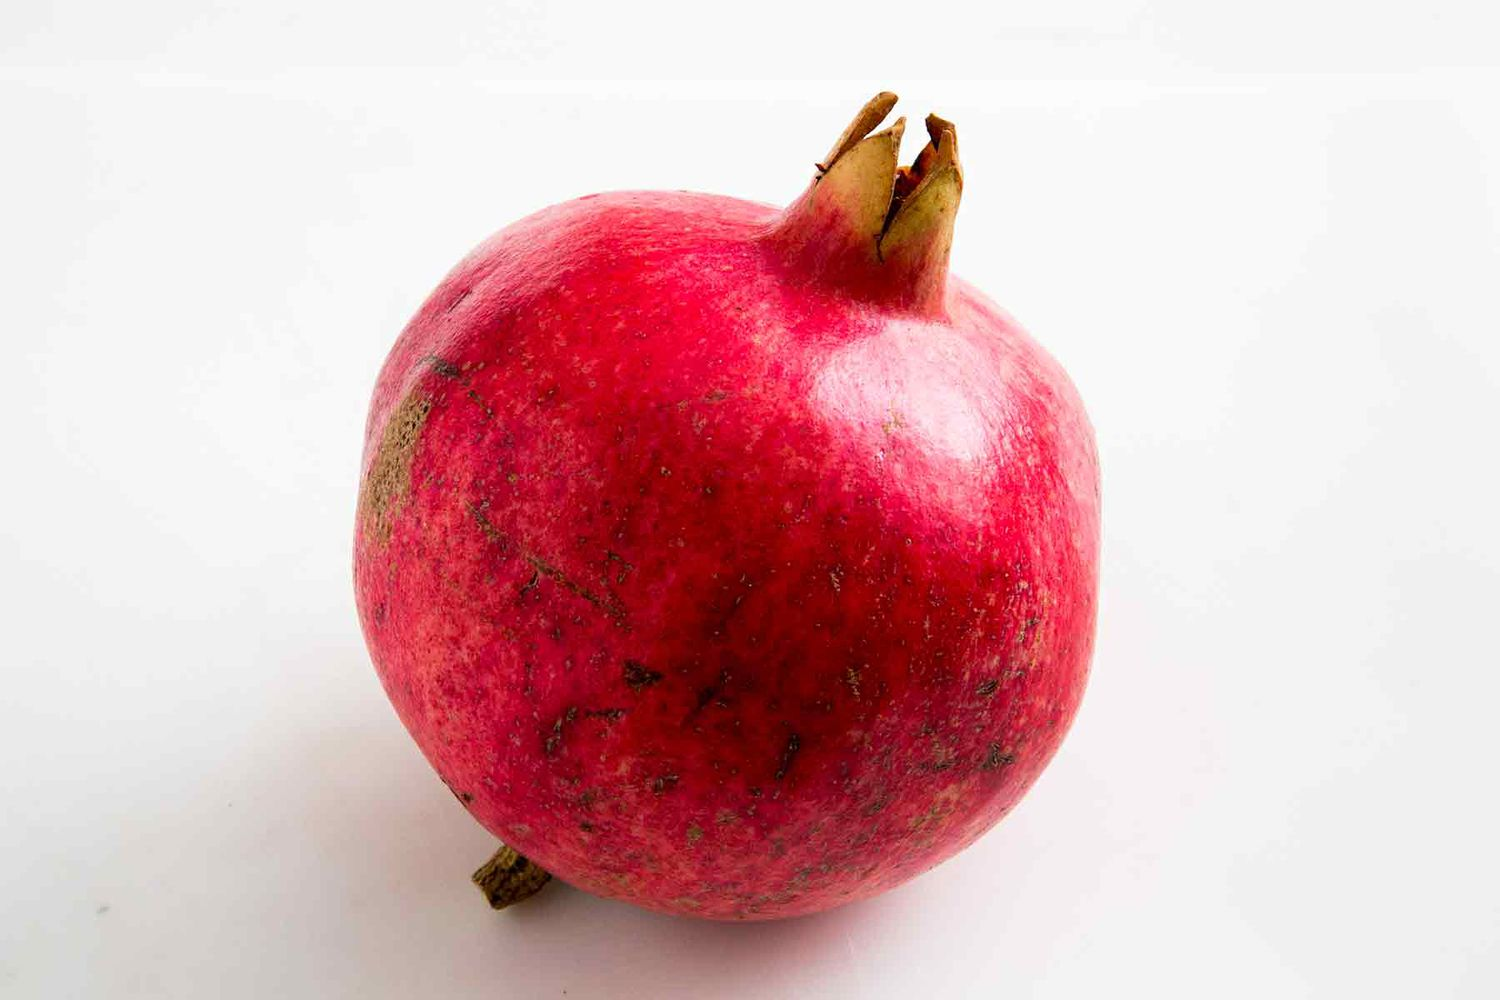

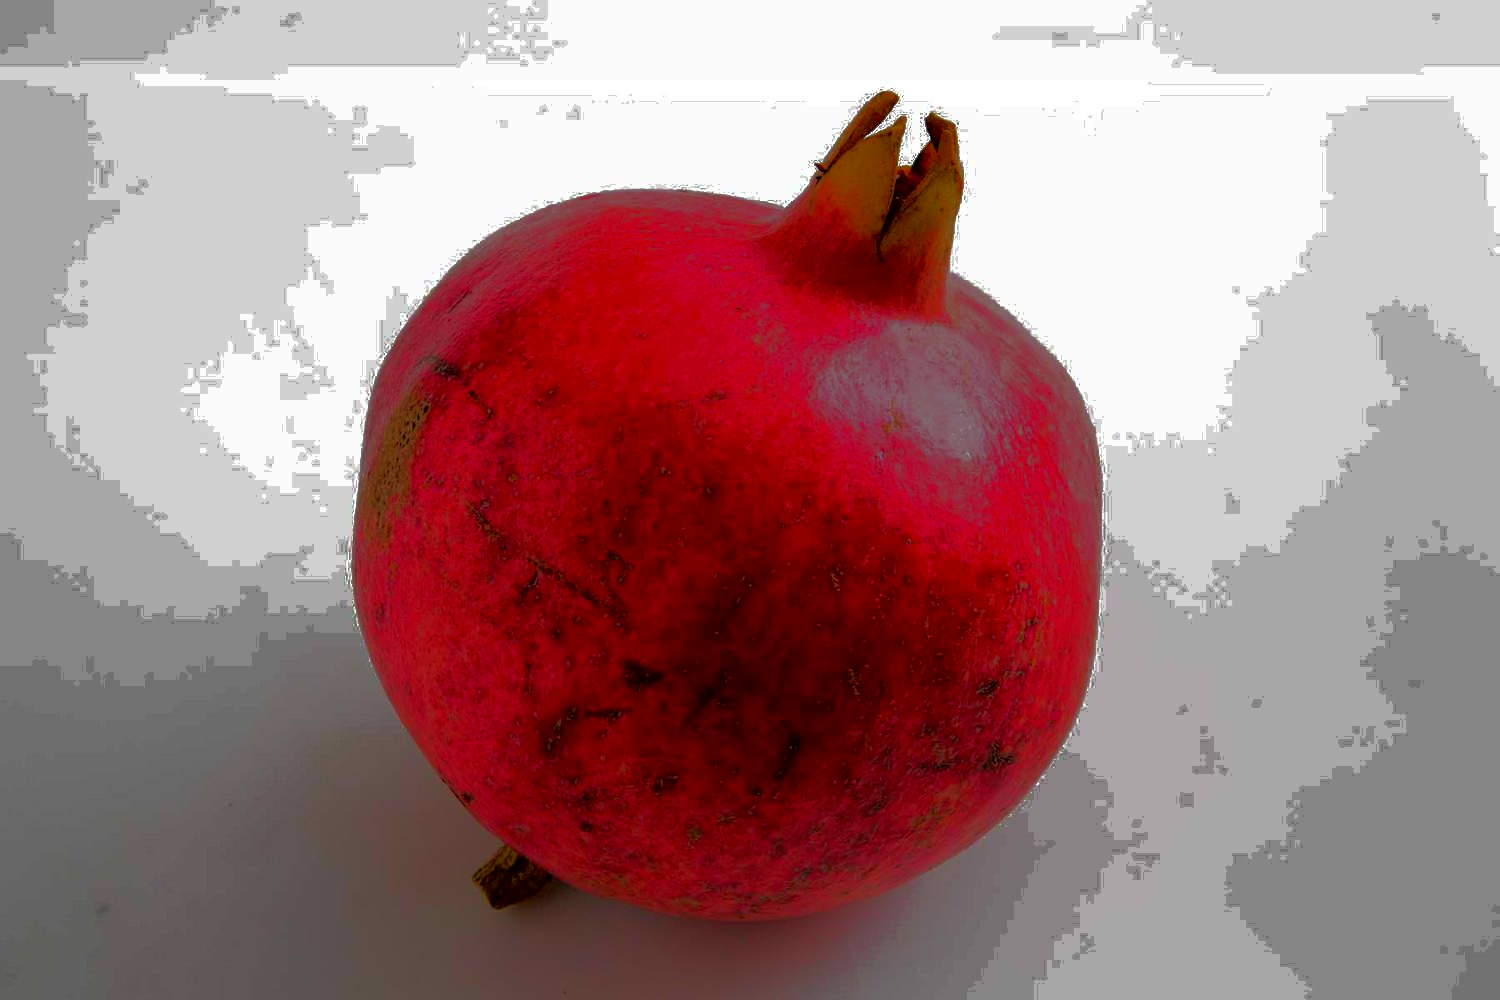

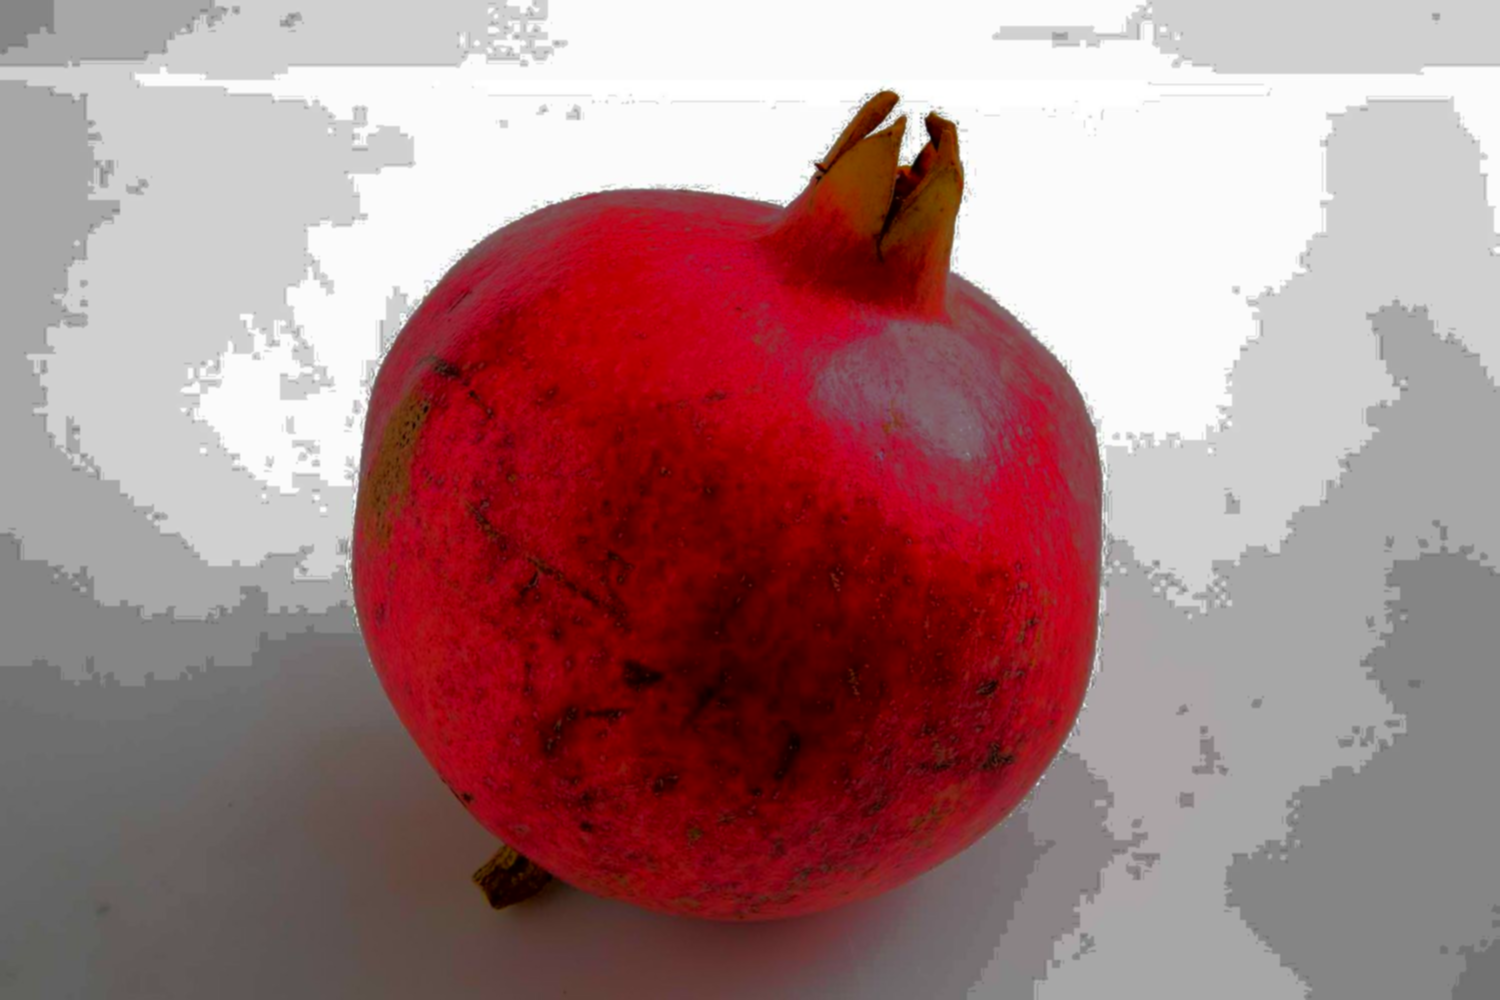

In [ ]:
def histogram_equalization(image):
    # Convert the image to grayscale if it's not already
    if len(image.shape) == 3:
        # Convert color image to YUV color space
        yuv_image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

        # Apply histogram equalization to the Y channel
        yuv_image[:,:,0] = cv2.equalizeHist(yuv_image[:,:,0])

        # Convert the image back to BGR
        equalized_image = cv2.cvtColor(yuv_image, cv2.COLOR_YUV2BGR)
    else:
        # Apply histogram equalization to grayscale image
        equalized_image = cv2.equalizeHist(image)

    return equalized_image

def noise_reduction(image, kernel_size=3):
    # Apply Gaussian blur for noise reduction
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

    return blurred_image

def preprocessing(image):
    # Perform histogram equalization
    equalized_image = histogram_equalization(image)

    # Perform noise reduction on the equalized image
    denoised_image = noise_reduction(equalized_image)

    return denoised_image

# Example usage:
image = cv2.imread('/content/PromoPic.jpg')
denoised_color_image = preprocessing(image)
color_image = histogram_equalization(image)
cv2_imshow(image)
cv2_imshow(color_image)
cv2_imshow(denoised_color_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#SPATIAL DOMAIN FEATURE EXTRACTION

##Converting image to RGB model and obtaining the R-mean, G-mean, and B-mean values

In [ ]:
def RGB_Model(image):
    # If the image is grayscale, convert it to BGR
    if len(image.shape) == 2:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Split the BGR image into its channels
    b, g, r = cv2.split(image)

    # Calculate the mean values for each channel
    mean_b = np.mean(b)
    mean_g = np.mean(g)
    mean_r = np.mean(r)

    return mean_r, mean_g, mean_b

##Converting image to HSV model and obtaining the Hue, Saturation, and value

In [ ]:
def HSV_Model(image):
    import numpy as np

    # Check if the image is grayscale
    if len(image.shape) == 2:
        # If grayscale, convert to BGR (assuming it was originally a color image)
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Convert the BGR image to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Split the HSV image into its channels
    h, s, v = cv2.split(hsv_image)

    # Calculate the mean values for each channel
    hue_mean = np.mean(h)
    saturation_mean = np.mean(s)
    value_mean = np.mean(v)

    return hue_mean, saturation_mean, value_mean

##Converting image to YCbCr model and obtaining the Y-mean, Cb-mean, and Cr-mean values

In [ ]:
def YCbCr_Model(image):
    # Check if the image is grayscale
    if len(image.shape) == 2:
        # If grayscale, convert to BGR (assuming it was originally a color image)
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Convert the image to YCbCr color space
    ycbcr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # Split the YCbCr image into its channels
    y, cb, cr = cv2.split(ycbcr_image)

    # Calculate the mean values for each channel
    y_mean = np.mean(y)
    cb_mean = np.mean(cb)
    cr_mean = np.mean(cr)

    return y_mean, cb_mean, cr_mean

##Converting image to La*b* model and obtaining the l-mean, a-mean, and b-mean values

In [ ]:
def lab_Model(image):
    # Check if the image is grayscale
    if len(image.shape) == 2:
        # If grayscale, convert to BGR (assuming it was originally a color image)
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Convert the image to L*a*b* color model
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Split the L*a*b* image into channels
    l_channel, a_channel, b_channel = cv2.split(lab_image)

    # Calculate mean values for L*, a*, and b* channels
    l_mean = np.mean(l_channel)
    a_mean = np.mean(a_channel)
    b_mean = np.mean(b_channel)

    return l_mean, a_mean, b_mean

##Converting image to CMYK model

In [ ]:
from PIL import Image
import numpy as np
from io import BytesIO

def cmyk_model(image_array):
    # Convert the NumPy array to a PIL Image
    img = Image.fromarray(image_array.astype('uint8'))

    # Convert the image to CMYK
    cmyk_img = img.convert('CMYK')

    # Convert the CMYK image to a NumPy array
    cmyk_array = np.array(cmyk_img)

    # Reshape the array to a 2D array (height x width, channels)
    cmyk_array_2d = cmyk_array.reshape((-1, 4))

    # Calculate mean values for each channel
    c_mean = np.mean(cmyk_array_2d[:, 0])
    m_mean = np.mean(cmyk_array_2d[:, 1])
    y_mean = np.mean(cmyk_array_2d[:, 2])
    k_mean = np.mean(cmyk_array_2d[:, 3])

    # Print mean values
    # print(f"C Mean: {c_mean}")
    # print(f"M Mean: {m_mean}")
    # print(f"Y Mean: {y_mean}")
    # print(f"K Mean: {k_mean}")

    # Close the image
    img.close()
    return c_mean, m_mean, y_mean, k_mean



# image_path = '/content/PromoPic.jpg'
# calculate_cmyk_means(image_path)

##Converting image to grayscale model and obtaining the contrast, corelation, energy, and other values

In [ ]:
def grayscale_model(image):
    # Convert color image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    unsigned_image = gray_image.astype(np.uint8)

    # Calculate the gray-level co-occurrence matrix (GLCM)
    glcm = graycomatrix(unsigned_image, distances=[1], angles=[0, np.pi/4, np.pi/2], symmetric=True, normed=True)

    # Calculate texture properties from the GLCM
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    entropy = -np.sum(glcm * np.ma.log(glcm).filled(0))

    # Print the results
    # print(f'Contrast: {contrast}')
    # print(f'Correlation: {correlation}')
    # print(f'Energy: {energy}')
    # print(f'Homogeneity: {homogeneity}')
    # print(f'Entropy: {entropy}')

    return contrast, correlation, energy, homogeneity, entropy

#WAVELET FEATURE EXTRACTION

In [ ]:
def extract_wavelet_features(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Define wavelet families
    wavelet_families = ['haar', 'db2', 'sym2']

    # Initialize features dictionary
    features_dict = {}

    # Iterate over each wavelet family
    for family in wavelet_families:
        # Perform 2D DWT at 3 levels
        coeffs = pywt.wavedec2(gray_image.astype(np.uint8), family, level=3)

        # Iterate over each level
        for level in range(1, 4):
            # Extract coefficients at the current level
            cA, (cH, cV, cD) = coeffs[0], coeffs[level]

            # Extract statistical features
            mean_value = np.mean(cA)
            std_deviation = np.std(cA)

            # Extract texture features from wavelet coefficients
            contrast, correlation, energy, homogeneity, entropy = grayscale_model(image)

            # Update the big dictionary
            key_prefix = f"{family}_level{level}"
            features_dict.update({
                f"{key_prefix}_mean": mean_value,
                f"{key_prefix}_std": std_deviation,
                f"{key_prefix}_contrast": contrast,
                f"{key_prefix}_correlation": correlation,
                f"{key_prefix}_energy": energy,
                f"{key_prefix}_homogeneity": homogeneity,
                f"{key_prefix}_entropy": entropy
            })
    wavlet_features_table = pd.DataFrame([features_dict])
    return wavlet_features_table

# image_path = '/content/PromoPic.jpg'
# image = cv2.imread(image_path)
# table = extract_wavelet_features(image)
# table

#HOG feature dataset creation

In [ ]:
import os
import cv2
import glob
import pandas as pd
from skimage.feature import hog
from skimage import exposure
from PIL import ImageOps, Image
from sklearn.preprocessing import LabelEncoder

def feature_extraction(img_i):
    resized = img_i.resize((64, 64))
    fd, hog_image = hog(resized, orientations=9,
                        pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2),
                        visualize=True,
                        multichannel=False)
    return fd

def iterating_hog(images, image_data_list, labels):
    for image in images:
        pic = ImageOps.grayscale(Image.open(image))
        features = feature_extraction(pic)

        # Extract label from image path
        for i, label in enumerate(labels):
            if label in image:
                lb = i
                break

        # Extract folder name from image path
        folder_name = os.path.basename(os.path.dirname(image))

        # Append the features, label, and folder name to the list
        image_data_list.append((features, lb, folder_name))

def iterate_through_folders_hog(root_folder):
    path = root_folder

    input_path = []
    labels = []

    for dirname, _, filenames in os.walk(path):
        labels.append(dirname.split("/")[-1])
        for file in filenames:
            input_path.append(os.path.join(dirname, file))

    labels = labels[1:]

    # Create an empty list to store individual samples
    hog_features_list = []

    for i, folder in enumerate(labels):
        print(f"Processing folder: {folder}")

        # Use glob to get all image files in the current folder
        images = glob.glob(os.path.join(path, folder, '*.jpg'))

        # Call the iterating function for each image in the folder
        iterating_hog(images, hog_features_list, labels)

    # Split the features, labels, and folder names
    features, labels, folders = zip(*hog_features_list)

    # Create a DataFrame with features, labels, and folder names
    df = pd.DataFrame(features)
    df['Folder Name'] = folders

    return df

# Example usage
root_folder_path = '/content/drive/MyDrive/to upload/'
df_hog = iterate_through_folders_hog(root_folder_path)
display(df_hog)

Processing folder: G3_Q1


<ipython-input-16-6e5d86b79b09>:12: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized, orientations=9,


Processing folder: G3_Q3
Processing folder: G1_Q4
Processing folder: G3_Q4
Processing folder: G3_Q2
Processing folder: G1_Q3
Processing folder: G2_Q4
Processing folder: G2_Q3
Processing folder: G2_Q1
Processing folder: G2_Q2
Processing folder: G1_Q2
Processing folder: G1_Q1


,0,1,2,3,4,5,6,7,8,9,...,1755,1756,1757,1758,1759,1760,1761,1762,1763,Folder Name
0,0.082948,0.039041,0.106864,0.132310,0.270657,0.000000,0.000000,0.000000,0.000000,0.395024,...,0.364860,0.009394,0.000000,0.000000,0.024528,0.063017,0.397344,0.065677,0.204106,G3_Q1
1,0.106316,0.021612,0.123017,0.156527,0.284865,0.095400,0.041006,0.021612,0.000000,0.284865,...,0.285351,0.011039,0.013363,0.035392,0.024567,0.145093,0.410554,0.044824,0.155185,G3_Q1
2,0.127958,0.304168,0.459840,0.063817,0.122142,0.009196,0.000000,0.000000,0.000000,0.311529,...,0.259535,0.009566,0.275376,0.073777,0.074725,0.307965,0.093427,0.084211,0.157987,G3_Q1
3,0.108303,0.435764,0.435764,0.045139,0.103020,0.000000,0.000000,0.000000,0.008353,0.295853,...,0.239075,0.000000,0.012194,0.099523,0.119282,0.295075,0.295075,0.030451,0.282466,G3_Q1
4,0.148910,0.274891,0.483755,0.000000,0.095291,0.000000,0.000000,0.000000,0.000000,0.217809,...,0.318370,0.135915,0.223986,0.141402,0.203656,0.130439,0.078732,0.007834,0.035385,G3_Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.388838,0.002883,0.002094,0.002664,0.009871,0.010935,0.005967,0.006903,0.032831,0.388838,...,0.113797,0.002508,0.001586,0.097952,0.412197,0.412197,0.121049,0.133788,0.219876,G1_Q1
1076,0.134868,0.457005,0.086136,0.006857,0.039032,0.000000,0.000000,0.000000,0.011057,0.124209,...,0.323501,0.146633,0.329641,0.116363,0.081768,0.000000,0.004674,0.008697,0.013538,G1_Q1
1077,0.174383,0.023474,0.123585,0.101970,0.199462,0.023474,0.051962,0.035211,0.038241,0.366460,...,0.155777,0.018022,0.000000,0.047002,0.308811,0.308811,0.308811,0.048578,0.037008,G1_Q1
1078,0.290147,0.073686,0.149458,0.066771,0.132596,0.017441,0.083275,0.063004,0.049330,0.290147,...,0.154368,0.092394,0.102373,0.154295,0.320181,0.238872,0.320181,0.020561,0.038251,G1_Q1


In [ ]:
excel_filename = 'hog.xlsx'
df_hog.to_excel(excel_filename, index=False)

In [ ]:
knnmodel(df_hog, 5)

Accuracy : 83.79629629629629 % 
Classification Report:
              precision    recall  f1-score   support

       G1_Q1       0.86      0.75      0.80        24
       G1_Q2       0.74      0.88      0.80        16
       G1_Q3       0.78      0.86      0.82        21
       G1_Q4       0.71      0.86      0.77        14
       G2_Q1       0.67      0.80      0.73        15
       G2_Q2       1.00      0.72      0.84        18
       G2_Q3       0.69      0.64      0.67        14
       G2_Q4       0.87      0.76      0.81        17
       G3_Q1       1.00      0.96      0.98        23
       G3_Q2       0.90      0.95      0.92        19
       G3_Q3       0.92      0.92      0.92        13
       G3_Q4       0.91      0.91      0.91        22

    accuracy                           0.84       216
   macro avg       0.84      0.83      0.83       216
weighted avg       0.85      0.84      0.84       216



In [ ]:
svmmodel(df_hog, 'linear')

SVM Accuracy: 90.74074074074075 %
Classification Report:
              precision    recall  f1-score   support

       G1_Q1       0.95      0.83      0.89        24
       G1_Q2       0.83      0.94      0.88        16
       G1_Q3       0.89      0.81      0.85        21
       G1_Q4       0.93      0.93      0.93        14
       G2_Q1       0.82      0.93      0.87        15
       G2_Q2       0.94      0.83      0.88        18
       G2_Q3       0.75      0.86      0.80        14
       G2_Q4       1.00      0.88      0.94        17
       G3_Q1       0.96      1.00      0.98        23
       G3_Q2       0.90      0.95      0.92        19
       G3_Q3       1.00      1.00      1.00        13
       G3_Q4       0.91      0.95      0.93        22

    accuracy                           0.91       216
   macro avg       0.91      0.91      0.91       216
weighted avg       0.91      0.91      0.91       216



In [ ]:
randomforestmodel(df_hog, 50)

Random Forest Accuracy: 82.87037037037037 %
Classification Report:
              precision    recall  f1-score   support

       G1_Q1       0.91      0.83      0.87        24
       G1_Q2       0.78      0.88      0.82        16
       G1_Q3       0.88      0.71      0.79        21
       G1_Q4       0.71      0.71      0.71        14
       G2_Q1       0.74      0.93      0.82        15
       G2_Q2       0.80      0.67      0.73        18
       G2_Q3       0.55      0.79      0.65        14
       G2_Q4       1.00      0.82      0.90        17
       G3_Q1       0.90      0.83      0.86        23
       G3_Q2       1.00      0.89      0.94        19
       G3_Q3       0.92      0.85      0.88        13
       G3_Q4       0.81      1.00      0.90        22

    accuracy                           0.83       216
   macro avg       0.83      0.83      0.82       216
weighted avg       0.85      0.83      0.83       216



In [ ]:
annmodel(df_hog)

Epoch 1/100
22/22 [==============================] - 1s 15ms/step - loss: 2.0295 - accuracy: 0.3300 - val_loss: 1.3972 - val_accuracy: 0.5260
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.8262 - accuracy: 0.7815 - val_loss: 0.8315 - val_accuracy: 0.7283
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.3672 - accuracy: 0.9363 - val_loss: 0.6432 - val_accuracy: 0.7514
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 0.1863 - accuracy: 0.9754 - val_loss: 0.5438 - val_accuracy: 0.8092
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.1135 - accuracy: 0.9942 - val_loss: 0.5022 - val_accuracy: 0.8150
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0755 - accuracy: 0.9942 - val_loss: 0.4660 - val_accuracy: 0.8266
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0504 - accuracy: 0.9957 - val_loss: 0.4619 - val_accuracy: 0.8208
Epoch 8/100


#ITERATING THROUGH ALL THE IMAGES

In [ ]:

# folder_dir = "/content/drive/MyDrive/to upload/G1_Q1/"
# images = glob.glob(folder_dir + '/*.jpg')
# for image in images:
#   img = cv2.imread(image)
#   cv2_imshow(img)
#   print(f"Image: {image}")

##Obtaining spatial domain features for every image

In [ ]:
def iterating_spatial_domain(images, image_data_list, folder_name):
    for image in images:
        img = cv2.imread(image)

        # preprocessing the image
        denoised_image = preprocessing(img)

        # Process image and extract features
        mean_r, mean_g, mean_b = RGB_Model(denoised_image)
        hue_mean, saturation_mean, value_mean = HSV_Model(denoised_image)
        y_mean, cb_mean, cr_mean = YCbCr_Model(denoised_image)
        l_mean, a_mean, b_mean = lab_Model(denoised_image)
        c_mean, m_mean, y_mean, k_mean = cmyk_model(denoised_image)
        contrast, correlation, energy, homogeneity, entropy = grayscale_model(denoised_image)

        # Create a temporary dataframe for the current image
        image_df = pd.DataFrame({
            'Folder Name': [folder_name],
            'Image Name': [image],
            'R Mean': [mean_r],
            'G Mean': [mean_g],
            'B Mean': [mean_b],
            'H Mean': [hue_mean],
            'S Mean': [saturation_mean],
            'V Mean': [value_mean],
            'Y Mean': [y_mean],
            'Cb Mean': [cb_mean],
            'Cr Mean': [cr_mean],
            'l_Mean': [l_mean],
            'a_Mean': [a_mean],
            'b_Mean': [b_mean],
            'c_Mean': [c_mean],
            'm_Mean': [m_mean],
            'y_Mean': [y_mean],
            'k_Mean': [k_mean],
            'contrast': [contrast],
            'correlation': [correlation],
            'energy': [energy],
            'homogeneity': [homogeneity],
            'entropy': [entropy]
        })

        # Append the temporary dataframe to the list
        image_data_list.append(image_df)

In [ ]:
def iterate_through_folders_spatial(root_folder):
    # Use glob to get all subdirectories (folders) in the root folder
    folders = glob.glob(os.path.join(root_folder, '*'))

    # Create an empty list to store individual dataframes
    spatial_domain_features_list = []

    for folder in folders:
        if os.path.isdir(folder):
            folder_name = os.path.basename(folder)  # Extract only the folder name
            print(f"Processing folder: {folder_name}")

            # Use glob to get all image files in the current folder
            images = glob.glob(os.path.join(folder, '*.jpg'))

            # Call the iterating function for each image in the folder
            iterating_spatial_domain(images, spatial_domain_features_list, folder_name)

    # Concatenate all dataframes in the list into a single dataframe
    spatial_domain_features_table = pd.concat(spatial_domain_features_list, ignore_index=True)

    # Display the resulting dataframe
    return spatial_domain_features_table

In [ ]:
root_folder_path = '/content/drive/MyDrive/to upload/'
d1 = iterate_through_folders_spatial(root_folder_path)
#d1.to_csv('output_file.csv')
d1

Processing folder: G3_Q1
Processing folder: G3_Q3
Processing folder: G1_Q4
Processing folder: G3_Q4
Processing folder: G3_Q2
Processing folder: G1_Q3
Processing folder: G2_Q4
Processing folder: G2_Q3
Processing folder: G2_Q1
Processing folder: G2_Q2
Processing folder: G1_Q2
Processing folder: G1_Q1


,Folder Name,Image Name,R Mean,G Mean,B Mean,H Mean,S Mean,V Mean,Y Mean,Cb Mean,...,b_Mean,c_Mean,m_Mean,y_Mean,k_Mean,contrast,correlation,energy,homogeneity,entropy
0,G3_Q1,/content/drive/MyDrive/to upload/G3_Q1/G3_Q1_0...,153.975430,124.091999,103.274159,27.695119,99.014931,156.204143,101.024570,144.634645,...,146.537678,151.725841,130.908001,101.024570,0.0,21.901853,0.997795,0.036452,0.570300,22.985391
1,G3_Q1,/content/drive/MyDrive/to upload/G3_Q1/G3_Q1_0...,156.552682,123.806849,99.124277,27.930911,107.979855,159.015369,98.447318,146.373677,...,149.191188,155.875723,131.193151,98.447318,0.0,22.336888,0.997753,0.041116,0.565697,22.957020
2,G3_Q1,/content/drive/MyDrive/to upload/G3_Q1/G3_Q1_0...,163.926421,122.708813,95.327198,19.233067,120.725561,163.957013,91.073579,150.836076,...,152.589231,159.672802,132.291187,91.073579,0.0,16.987796,0.998226,0.033738,0.488058,23.424786
3,G3_Q1,/content/drive/MyDrive/to upload/G3_Q1/G3_Q1_0...,161.291220,124.333256,97.415145,26.857699,116.801892,162.545958,93.708780,148.676663,...,152.219533,157.584855,130.666744,93.708780,0.0,16.591181,0.998242,0.036080,0.525446,22.957980
4,G3_Q1,/content/drive/MyDrive/to upload/G3_Q1/G3_Q1_0...,165.047831,122.894540,99.728936,28.442255,113.789571,165.647819,89.952169,150.968989,...,151.754125,155.271064,132.105460,89.952169,0.0,13.842181,0.998519,0.040316,0.548531,22.605443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,G1_Q1,/content/drive/MyDrive/to upload/G1_Q1/G1_Q1_3...,155.403526,118.555518,111.693007,57.654661,95.496974,158.198952,99.596474,146.967671,...,140.329788,143.306993,136.444482,99.596474,0.0,13.121824,0.998768,0.040248,0.524277,23.153196
1076,G1_Q1,/content/drive/MyDrive/to upload/G1_Q1/G1_Q1_2...,169.393464,120.758013,95.880666,24.071722,122.461444,169.546553,85.606536,154.340962,...,153.399185,159.119334,134.241987,85.606536,0.0,16.104243,0.998278,0.035922,0.512238,23.253296
1077,G1_Q1,/content/drive/MyDrive/to upload/G1_Q1/G1_Q1_2...,166.301991,118.944337,102.538821,46.062734,111.933849,172.324792,88.698009,152.992994,...,149.683085,152.461179,136.055663,88.698009,0.0,12.110635,0.998760,0.040227,0.591647,22.468710
1078,G1_Q1,/content/drive/MyDrive/to upload/G1_Q1/G1_Q1_2...,164.887440,118.923383,95.645890,21.873291,121.623155,166.236213,90.112560,152.881568,...,151.228331,159.354110,136.076617,90.112560,0.0,21.592045,0.997857,0.037789,0.527990,23.408911


##Obtaining frequency domain features for every image

In [ ]:
def iterating_wavlet(images, folder_name):
    wavelet_features_tables = []  # Initialize an empty list to store individual DataFrames

    for image in images:
        img = cv2.imread(image)

        # preprocessing the image
        denoised_image = preprocessing(img)

        # Process image and extract features
        wavelet_features_table = extract_wavelet_features(denoised_image)

        # Append the temporary dataframe to the list
        wavelet_features_tables.append(wavelet_features_table)

    # Concatenate all DataFrames in the list
    result_dataframe = pd.concat(wavelet_features_tables, ignore_index=True)
    return result_dataframe

In [ ]:
def iterate_through_folders_wavlet(root_folder):
    # Use glob to get all subdirectories (folders) in the root folder
    folders = glob.glob(os.path.join(root_folder, '*'))

    wavelet_features_tables = []  # Initialize an empty list to store individual DataFrames

    for folder in folders:
        if os.path.isdir(folder):
            folder_name = os.path.basename(folder)  # Extract only the folder name
            print(f"Processing folder: {folder_name}")

            # Use glob to get all image files in the current folder
            images = glob.glob(os.path.join(folder, '*.jpg'))

            # Call the iterating function for each image in the folder
            wavelet_features_table = iterating_wavlet(images, folder_name)

            # Append the resulting dataframe to the list
            wavelet_features_tables.append(wavelet_features_table)

    # Concatenate all DataFrames in the list
    result_dataframe = pd.concat(wavelet_features_tables, ignore_index=True)
    return result_dataframe

In [ ]:
root_folder_path = '/content/drive/MyDrive/to upload/'
d2 = iterate_through_folders_wavlet(root_folder_path)
d2

Processing folder: G3_Q1
Processing folder: G3_Q3
Processing folder: G1_Q4
Processing folder: G3_Q4
Processing folder: G3_Q2
Processing folder: G1_Q3
Processing folder: G2_Q4
Processing folder: G2_Q3
Processing folder: G2_Q1
Processing folder: G2_Q2
Processing folder: G1_Q2
Processing folder: G1_Q1


,haar_level1_mean,haar_level1_std,haar_level1_contrast,haar_level1_correlation,haar_level1_energy,haar_level1_homogeneity,haar_level1_entropy,haar_level2_mean,haar_level2_std,haar_level2_contrast,...,sym2_level2_energy,sym2_level2_homogeneity,sym2_level2_entropy,sym2_level3_mean,sym2_level3_std,sym2_level3_contrast,sym2_level3_correlation,sym2_level3_energy,sym2_level3_homogeneity,sym2_level3_entropy
0,1045.143568,558.499890,21.901853,0.997795,0.036452,0.570300,22.985391,1045.143568,558.499890,21.901853,...,0.036452,0.570300,22.985391,1060.690282,567.360784,21.901853,0.997795,0.036452,0.570300,22.985391
1,1046.195651,558.883797,22.336888,0.997753,0.041116,0.565697,22.957020,1046.195651,558.883797,22.336888,...,0.041116,0.565697,22.957020,1060.793265,567.429865,22.336888,0.997753,0.041116,0.565697,22.957020
2,1055.280686,548.769477,16.987796,0.998226,0.033738,0.488058,23.424786,1055.280686,548.769477,16.987796,...,0.033738,0.488058,23.424786,1075.762544,556.975868,16.987796,0.998226,0.033738,0.488058,23.424786
3,1058.461493,544.818325,16.591181,0.998242,0.036080,0.525446,22.957980,1058.461493,544.818325,16.591181,...,0.036080,0.525446,22.957980,1079.616196,553.752157,16.591181,0.998242,0.036080,0.525446,22.957980
4,1062.770200,543.336220,13.842181,0.998519,0.040316,0.548531,22.605443,1062.770200,543.336220,13.842181,...,0.040316,0.548531,22.605443,1082.328173,551.371984,13.842181,0.998519,0.040316,0.548531,22.605443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,1030.310052,580.360222,13.121824,0.998768,0.040248,0.524277,23.153196,1030.310052,580.360222,13.121824,...,0.040248,0.524277,23.153196,1037.792716,588.479011,13.121824,0.998768,0.040248,0.524277,23.153196
1076,1059.654227,542.703602,16.104243,0.998278,0.035922,0.512238,23.253296,1059.654227,542.703602,16.104243,...,0.035922,0.512238,23.253296,1080.948133,551.580983,16.104243,0.998278,0.035922,0.512238,23.253296
1077,1049.945564,555.705067,12.110635,0.998760,0.040227,0.591647,22.468710,1049.945564,555.705067,12.110635,...,0.040227,0.591647,22.468710,1064.892362,562.778939,12.110635,0.998760,0.040227,0.591647,22.468710
1078,1040.012813,562.967817,21.592045,0.997857,0.037789,0.527990,23.408911,1040.012813,562.967817,21.592045,...,0.037789,0.527990,23.408911,1053.024983,572.212460,21.592045,0.997857,0.037789,0.527990,23.408911


In [ ]:
d2['Folder Name'] = d1['Folder Name']
d2

,haar_level1_mean,haar_level1_std,haar_level1_contrast,haar_level1_correlation,haar_level1_energy,haar_level1_homogeneity,haar_level1_entropy,haar_level2_mean,haar_level2_std,haar_level2_contrast,...,sym2_level2_homogeneity,sym2_level2_entropy,sym2_level3_mean,sym2_level3_std,sym2_level3_contrast,sym2_level3_correlation,sym2_level3_energy,sym2_level3_homogeneity,sym2_level3_entropy,Folder Name
0,1045.143568,558.499890,21.901853,0.997795,0.036452,0.570300,22.985391,1045.143568,558.499890,21.901853,...,0.570300,22.985391,1060.690282,567.360784,21.901853,0.997795,0.036452,0.570300,22.985391,G3_Q1
1,1046.195651,558.883797,22.336888,0.997753,0.041116,0.565697,22.957020,1046.195651,558.883797,22.336888,...,0.565697,22.957020,1060.793265,567.429865,22.336888,0.997753,0.041116,0.565697,22.957020,G3_Q1
2,1055.280686,548.769477,16.987796,0.998226,0.033738,0.488058,23.424786,1055.280686,548.769477,16.987796,...,0.488058,23.424786,1075.762544,556.975868,16.987796,0.998226,0.033738,0.488058,23.424786,G3_Q1
3,1058.461493,544.818325,16.591181,0.998242,0.036080,0.525446,22.957980,1058.461493,544.818325,16.591181,...,0.525446,22.957980,1079.616196,553.752157,16.591181,0.998242,0.036080,0.525446,22.957980,G3_Q1
4,1062.770200,543.336220,13.842181,0.998519,0.040316,0.548531,22.605443,1062.770200,543.336220,13.842181,...,0.548531,22.605443,1082.328173,551.371984,13.842181,0.998519,0.040316,0.548531,22.605443,G3_Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,1030.310052,580.360222,13.121824,0.998768,0.040248,0.524277,23.153196,1030.310052,580.360222,13.121824,...,0.524277,23.153196,1037.792716,588.479011,13.121824,0.998768,0.040248,0.524277,23.153196,G1_Q1
1076,1059.654227,542.703602,16.104243,0.998278,0.035922,0.512238,23.253296,1059.654227,542.703602,16.104243,...,0.512238,23.253296,1080.948133,551.580983,16.104243,0.998278,0.035922,0.512238,23.253296,G1_Q1
1077,1049.945564,555.705067,12.110635,0.998760,0.040227,0.591647,22.468710,1049.945564,555.705067,12.110635,...,0.591647,22.468710,1064.892362,562.778939,12.110635,0.998760,0.040227,0.591647,22.468710,G1_Q1
1078,1040.012813,562.967817,21.592045,0.997857,0.037789,0.527990,23.408911,1040.012813,562.967817,21.592045,...,0.527990,23.408911,1053.024983,572.212460,21.592045,0.997857,0.037789,0.527990,23.408911,G1_Q1


# **Data Pre-Proccessing (Wavelet)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

all_columns = d2.columns.tolist()
columns_to_normalize = all_columns[:-1]
# MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
# Normalizing the selected columns
d2[columns_to_normalize] = scaler.fit_transform(d2[columns_to_normalize])
d2

,haar_level1_mean,haar_level1_std,haar_level1_contrast,haar_level1_correlation,haar_level1_energy,haar_level1_homogeneity,haar_level1_entropy,haar_level2_mean,haar_level2_std,haar_level2_contrast,...,sym2_level2_homogeneity,sym2_level2_entropy,sym2_level3_mean,sym2_level3_std,sym2_level3_contrast,sym2_level3_correlation,sym2_level3_energy,sym2_level3_homogeneity,sym2_level3_entropy,Folder Name
0,-0.278989,-0.561166,-0.035177,0.042725,-0.906527,-0.376956,0.641067,-0.278989,-0.561166,-0.035177,...,-0.376956,0.641067,-0.149514,-0.504217,-0.035177,0.042725,-0.906527,-0.376956,0.641067,G3_Q1
1,-0.240152,-0.552393,-0.013801,0.022055,-0.850375,-0.401613,0.633016,-0.240152,-0.552393,-0.013801,...,-0.401613,0.633016,-0.146609,-0.502541,-0.013801,0.022055,-0.850375,-0.401613,0.633016,G3_Q1
2,0.095214,-0.783527,-0.276631,0.252302,-0.939194,-0.817515,0.765761,0.095214,-0.783527,-0.276631,...,-0.817515,0.765761,0.275689,-0.756165,-0.276631,0.252302,-0.939194,-0.817515,0.765761,G3_Q1
3,0.212631,-0.873820,-0.296119,0.260340,-0.911003,-0.617234,0.633289,0.212631,-0.873820,-0.296119,...,-0.617234,0.633289,0.384404,-0.834376,-0.296119,0.260340,-0.911003,-0.617234,0.633289,G3_Q1
4,0.371683,-0.907689,-0.431193,0.395279,-0.860015,-0.493570,0.533245,0.371683,-0.907689,-0.431193,...,-0.493570,0.533245,0.460911,-0.892121,-0.431193,0.395279,-0.860015,-0.493570,0.533245,G3_Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,-0.826555,-0.061609,-0.466588,0.516653,-0.860824,-0.623495,0.688688,-0.826555,-0.061609,-0.466588,...,-0.623495,0.688688,-0.795476,0.008133,-0.466588,0.516653,-0.860824,-0.623495,0.688688,G1_Q1
1076,0.256660,-0.922146,-0.320045,0.278012,-0.912899,-0.687987,0.717095,0.256660,-0.922146,-0.320045,...,-0.687987,0.717095,0.421979,-0.887051,-0.320045,0.278012,-0.912899,-0.687987,0.717095,G1_Q1
1077,-0.101727,-0.625034,-0.516273,0.512583,-0.861079,-0.262599,0.494442,-0.101727,-0.625034,-0.516273,...,-0.262599,0.494442,-0.030969,-0.615377,-0.516273,0.512583,-0.861079,-0.262599,0.494442,G1_Q1
1078,-0.468386,-0.459064,-0.050399,0.072789,-0.890427,-0.603606,0.761256,-0.468386,-0.459064,-0.050399,...,-0.603606,0.761256,-0.365759,-0.386510,-0.050399,0.072789,-0.890427,-0.603606,0.761256,G1_Q1


In [ ]:
excel_filename = 'wavelet.xlsx'
d2.to_excel(excel_filename, index=False)

# **Models**

In [ ]:
randomforestmodel(d2, 64)

Random Forest Accuracy: 55.092592592592595 %
Classification Report:
              precision    recall  f1-score   support

       G1_Q1       0.71      0.71      0.71        24
       G1_Q2       0.59      0.62      0.61        16
       G1_Q3       0.71      0.48      0.57        21
       G1_Q4       0.38      0.43      0.40        14
       G2_Q1       0.43      0.60      0.50        15
       G2_Q2       0.40      0.33      0.36        18
       G2_Q3       0.27      0.29      0.28        14
       G2_Q4       0.39      0.53      0.45        17
       G3_Q1       0.84      0.70      0.76        23
       G3_Q2       0.63      0.63      0.63        19
       G3_Q3       0.67      0.62      0.64        13
       G3_Q4       0.57      0.55      0.56        22

    accuracy                           0.55       216
   macro avg       0.55      0.54      0.54       216
weighted avg       0.57      0.55      0.56       216



In [ ]:
svmmodel(d2, 'rbf')

SVM Accuracy: 47.68518518518518 %
Classification Report:
              precision    recall  f1-score   support

       G1_Q1       0.70      0.79      0.75        24
       G1_Q2       0.47      0.44      0.45        16
       G1_Q3       0.50      0.19      0.28        21
       G1_Q4       0.17      0.29      0.21        14
       G2_Q1       0.41      0.73      0.52        15
       G2_Q2       0.35      0.33      0.34        18
       G2_Q3       0.75      0.21      0.33        14
       G2_Q4       0.25      0.29      0.27        17
       G3_Q1       0.94      0.65      0.77        23
       G3_Q2       0.57      0.63      0.60        19
       G3_Q3       0.47      0.62      0.53        13
       G3_Q4       0.45      0.41      0.43        22

    accuracy                           0.48       216
   macro avg       0.50      0.47      0.46       216
weighted avg       0.52      0.48      0.47       216



In [ ]:
knnmodel(d2, 13)

Accuracy : 48.148148148148145 % 
Classification Report:
              precision    recall  f1-score   support

       G1_Q1       0.60      0.75      0.67        24
       G1_Q2       0.43      0.38      0.40        16
       G1_Q3       0.78      0.33      0.47        21
       G1_Q4       0.31      0.57      0.40        14
       G2_Q1       0.46      0.73      0.56        15
       G2_Q2       0.33      0.39      0.36        18
       G2_Q3       0.17      0.07      0.10        14
       G2_Q4       0.37      0.41      0.39        17
       G3_Q1       0.85      0.48      0.61        23
       G3_Q2       0.43      0.47      0.45        19
       G3_Q3       0.67      0.77      0.71        13
       G3_Q4       0.50      0.41      0.45        22

    accuracy                           0.48       216
   macro avg       0.49      0.48      0.46       216
weighted avg       0.51      0.48      0.47       216



In [ ]:
annmodel(d2)

Epoch 1/100
22/22 [==============================] - 2s 15ms/step - loss: 2.5291 - accuracy: 0.1114 - val_loss: 2.3098 - val_accuracy: 0.1792
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 2.1659 - accuracy: 0.2735 - val_loss: 2.0956 - val_accuracy: 0.2717
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 1.9741 - accuracy: 0.3082 - val_loss: 1.9729 - val_accuracy: 0.2601
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 1.8378 - accuracy: 0.3719 - val_loss: 1.8614 - val_accuracy: 0.3179
Epoch 5/100
22/22 [==============================] - 0s 6ms/step - loss: 1.7329 - accuracy: 0.3893 - val_loss: 1.7778 - val_accuracy: 0.3757
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - loss: 1.6642 - accuracy: 0.4182 - val_loss: 1.7288 - val_accuracy: 0.3873
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 1.5979 - accuracy: 0.4385 - val_loss: 1.6789 - val_accuracy: 0.4046
Epoch 8/100


# Data Proccessing (Spatial)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming d1 is your DataFrame
# Replace the column names in the list below with the columns you want to normalize
columns_to_normalize = ['R Mean', 'G Mean', 'B Mean', 'H Mean', 'S Mean', 'V Mean', 'Y Mean', 'Cb Mean', 'Cr Mean', 'l_Mean', 'a_Mean', 'b_Mean', 'c_Mean', 'm_Mean', 'y_Mean', 'k_Mean', 'contrast', 'correlation', 'energy', 'homogeneity', 'entropy']
# Create a MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
# Normalize the selected columns
d1[columns_to_normalize] = scaler.fit_transform(d1[columns_to_normalize])
d1

,Folder Name,Image Name,R Mean,G Mean,B Mean,H Mean,S Mean,V Mean,Y Mean,Cb Mean,...,b_Mean,c_Mean,m_Mean,y_Mean,k_Mean,contrast,correlation,energy,homogeneity,entropy
0,G3_Q1,/content/drive/MyDrive/to upload/G3_Q1/G3_Q1_0...,0.131806,-0.040350,-0.063238,-0.649221,0.070100,-0.220440,-0.131806,0.148043,...,0.245422,0.063238,0.040350,-0.131806,-1.0,-0.035177,0.042725,-0.906527,-0.376956,0.641067
1,G3_Q1,/content/drive/MyDrive/to upload/G3_Q1/G3_Q1_0...,0.218123,-0.064799,-0.259825,-0.642760,0.323070,-0.082769,-0.218123,0.233297,...,0.463132,0.259825,0.064799,-0.218123,-1.0,-0.013801,0.022055,-0.850375,-0.401613,0.633016
2,G3_Q1,/content/drive/MyDrive/to upload/G3_Q1/G3_Q1_0...,0.465085,-0.158943,-0.439700,-0.881107,0.682725,0.159233,-0.465085,0.452061,...,0.741929,0.439700,0.158943,-0.465085,-1.0,-0.276631,0.252302,-0.939194,-0.817515,0.765761
3,G3_Q1,/content/drive/MyDrive/to upload/G3_Q1/G3_Q1_0...,0.376827,-0.019665,-0.340790,-0.672169,0.572008,0.090131,-0.376827,0.346198,...,0.711597,0.340790,0.019665,-0.376827,-1.0,-0.296119,0.260340,-0.911003,-0.617234,0.633289
4,G3_Q1,/content/drive/MyDrive/to upload/G3_Q1/G3_Q1_0...,0.502644,-0.143019,-0.231181,-0.628747,0.487007,0.242036,-0.502644,0.458577,...,0.673412,0.231181,0.143019,-0.502644,-1.0,-0.431193,0.395279,-0.860015,-0.493570,0.533245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,G1_Q1,/content/drive/MyDrive/to upload/G1_Q1/G1_Q1_3...,0.179636,-0.515043,0.335578,0.171763,-0.029168,-0.122751,-0.179636,0.262417,...,-0.263912,-0.335578,0.515043,-0.179636,-1.0,-0.466588,0.516653,-0.860824,-0.623495,0.688688
1076,G1_Q1,/content/drive/MyDrive/to upload/G1_Q1/G1_Q1_2...,0.648188,-0.326203,-0.413481,-0.748513,0.731708,0.432965,-0.648188,0.623884,...,0.808383,0.413481,0.326203,-0.648188,-1.0,-0.320045,0.278012,-0.912899,-0.687987,0.717095
1077,G1_Q1,/content/drive/MyDrive/to upload/G1_Q1/G1_Q1_2...,0.544648,-0.481706,-0.098072,-0.145891,0.434643,0.569021,-0.544648,0.557801,...,0.503491,0.098072,0.481706,-0.544648,-1.0,-0.516273,0.512583,-0.861079,-0.262599,0.494442
1078,G1_Q1,/content/drive/MyDrive/to upload/G1_Q1/G1_Q1_2...,0.497272,-0.483502,-0.424603,-0.808757,0.708053,0.270851,-0.497272,0.552339,...,0.630272,0.424603,0.483502,-0.497272,-1.0,-0.050399,0.072789,-0.890427,-0.603606,0.761256


In [ ]:
spatial_domain_df = d1.drop("Image Name", axis=1)
spatial_domain_df

,Folder Name,R Mean,G Mean,B Mean,H Mean,S Mean,V Mean,Y Mean,Cb Mean,Cr Mean,...,b_Mean,c_Mean,m_Mean,y_Mean,k_Mean,contrast,correlation,energy,homogeneity,entropy
0,G3_Q1,0.131806,-0.040350,-0.063238,-0.649221,0.070100,-0.220440,-0.131806,0.148043,-0.148879,...,0.245422,0.063238,0.040350,-0.131806,-1.0,-0.035177,0.042725,-0.906527,-0.376956,0.641067
1,G3_Q1,0.218123,-0.064799,-0.259825,-0.642760,0.323070,-0.082769,-0.218123,0.233297,-0.356946,...,0.463132,0.259825,0.064799,-0.218123,-1.0,-0.013801,0.022055,-0.850375,-0.401613,0.633016
2,G3_Q1,0.465085,-0.158943,-0.439700,-0.881107,0.682725,0.159233,-0.465085,0.452061,-0.597307,...,0.741929,0.439700,0.158943,-0.465085,-1.0,-0.276631,0.252302,-0.939194,-0.817515,0.765761
3,G3_Q1,0.376827,-0.019665,-0.340790,-0.672169,0.572008,0.090131,-0.376827,0.346198,-0.514886,...,0.711597,0.340790,0.019665,-0.376827,-1.0,-0.296119,0.260340,-0.911003,-0.617234,0.633289
4,G3_Q1,0.502644,-0.143019,-0.231181,-0.628747,0.487007,0.242036,-0.502644,0.458577,-0.427608,...,0.673412,0.231181,0.143019,-0.502644,-1.0,-0.431193,0.395279,-0.860015,-0.493570,0.533245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,G1_Q1,0.179636,-0.515043,0.335578,0.171763,-0.029168,-0.122751,-0.179636,0.262417,0.353657,...,-0.263912,-0.335578,0.515043,-0.179636,-1.0,-0.466588,0.516653,-0.860824,-0.623495,0.688688
1076,G1_Q1,0.648188,-0.326203,-0.413481,-0.748513,0.731708,0.432965,-0.648188,0.623884,-0.596504,...,0.808383,0.413481,0.326203,-0.648188,-1.0,-0.320045,0.278012,-0.912899,-0.687987,0.717095
1077,G1_Q1,0.544648,-0.481706,-0.098072,-0.145891,0.434643,0.569021,-0.544648,0.557801,-0.213265,...,0.503491,0.098072,0.481706,-0.544648,-1.0,-0.516273,0.512583,-0.861079,-0.262599,0.494442
1078,G1_Q1,0.497272,-0.483502,-0.424603,-0.808757,0.708053,0.270851,-0.497272,0.552339,-0.487755,...,0.630272,0.424603,0.483502,-0.497272,-1.0,-0.050399,0.072789,-0.890427,-0.603606,0.761256


In [ ]:
excel_filename = 'spatial.xlsx'
d1.to_excel(excel_filename, index=False)

In [ ]:
knnmodel(spatial_domain_df, 12)

Accuracy : 51.85185185185185 % 
Classification Report:
              precision    recall  f1-score   support

       G1_Q1       0.80      0.50      0.62        24
       G1_Q2       0.43      0.62      0.51        16
       G1_Q3       0.47      0.38      0.42        21
       G1_Q4       0.38      0.57      0.46        14
       G2_Q1       0.70      0.47      0.56        15
       G2_Q2       0.33      0.33      0.33        18
       G2_Q3       0.27      0.21      0.24        14
       G2_Q4       0.43      0.35      0.39        17
       G3_Q1       0.72      0.78      0.75        23
       G3_Q2       0.50      0.63      0.56        19
       G3_Q3       0.61      0.85      0.71        13
       G3_Q4       0.55      0.50      0.52        22

    accuracy                           0.52       216
   macro avg       0.52      0.52      0.51       216
weighted avg       0.53      0.52      0.51       216



In [ ]:
svmmodel(spatial_domain_df, 'linear')

SVM Accuracy: 58.333333333333336 %
Classification Report:
              precision    recall  f1-score   support

       G1_Q1       0.72      0.75      0.73        24
       G1_Q2       0.43      0.62      0.51        16
       G1_Q3       0.53      0.38      0.44        21
       G1_Q4       0.20      0.14      0.17        14
       G2_Q1       0.78      0.93      0.85        15
       G2_Q2       0.53      0.50      0.51        18
       G2_Q3       0.20      0.29      0.24        14
       G2_Q4       0.55      0.35      0.43        17
       G3_Q1       0.86      0.83      0.84        23
       G3_Q2       0.65      0.58      0.61        19
       G3_Q3       0.69      0.85      0.76        13
       G3_Q4       0.64      0.64      0.64        22

    accuracy                           0.58       216
   macro avg       0.56      0.57      0.56       216
weighted avg       0.59      0.58      0.58       216



In [ ]:
randomforestmodel(spatial_domain_df, 60)

Random Forest Accuracy: 56.018518518518526 %
Classification Report:
              precision    recall  f1-score   support

       G1_Q1       0.81      0.54      0.65        24
       G1_Q2       0.67      0.50      0.57        16
       G1_Q3       0.61      0.52      0.56        21
       G1_Q4       0.33      0.50      0.40        14
       G2_Q1       0.55      0.73      0.63        15
       G2_Q2       0.43      0.33      0.38        18
       G2_Q3       0.38      0.21      0.27        14
       G2_Q4       0.29      0.35      0.32        17
       G3_Q1       0.71      0.87      0.78        23
       G3_Q2       0.60      0.63      0.62        19
       G3_Q3       0.65      0.85      0.73        13
       G3_Q4       0.62      0.59      0.60        22

    accuracy                           0.56       216
   macro avg       0.55      0.55      0.54       216
weighted avg       0.57      0.56      0.56       216



In [ ]:
annmodel(spatial_domain_df)

Epoch 1/100
22/22 [==============================] - 1s 10ms/step - loss: 2.5191 - accuracy: 0.0608 - val_loss: 2.4328 - val_accuracy: 0.0983
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 2.2555 - accuracy: 0.1968 - val_loss: 2.2657 - val_accuracy: 0.2254
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 2.0807 - accuracy: 0.3256 - val_loss: 2.1188 - val_accuracy: 0.2717
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 1.9270 - accuracy: 0.3806 - val_loss: 1.9644 - val_accuracy: 0.3121
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 1.7913 - accuracy: 0.4052 - val_loss: 1.8378 - val_accuracy: 0.3584
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 1.6825 - accuracy: 0.4515 - val_loss: 1.7312 - val_accuracy: 0.3699
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 1.6005 - accuracy: 0.4559 - val_loss: 1.6621 - val_accuracy: 0.4104
Epoch 8/100


GridSearchCV for ann

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import numpy as np

def ann_grid(dataset):
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler, LabelEncoder
    from sklearn.metrics import accuracy_score

    X = dataset.drop('Folder Name', axis=1)  # Features
    y = dataset['Folder Name']  # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardizing the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Label Encoding for the target variable
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Convert the labels to one-hot encoding
    y_train_categorical = tf.keras.utils.to_categorical(y_train_encoded)
    y_test_categorical = tf.keras.utils.to_categorical(y_test_encoded)

    # Function to create the ANN model
    def create_ann_model(optimizer='adam', activation='relu', neurons_layer1=64, neurons_layer2=32):
        model = Sequential()
        model.add(Dense(units=neurons_layer1, activation=activation, input_dim=X_train_scaled.shape[1]))
        model.add(Dense(units=neurons_layer2, activation=activation))
        model.add(Dense(units=len(dataset['Folder Name'].unique()), activation='softmax'))

        model.compile(optimizer=optimizer,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        return model

    # Create KerasClassifier wrapper for GridSearchCV
    ann_classifier = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=32, verbose=0)

    # Define the hyperparameters to search
    param_grid = {
        'neurons_layer1': [64, 128],
        'neurons_layer2': [32, 64],
        'activation': ['relu', 'sigmoid'],
        'optimizer': ['adam', 'rmsprop']
    }

    # Perform Grid Search Cross-Validation
    grid_search = GridSearchCV(estimator=ann_classifier, param_grid=param_grid, cv=3, verbose=2)
    grid_search.fit(X_train_scaled, y_train_categorical)

    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print("Best Parameters:", best_params)
    print("Best Score:", best_score)

    # Train the model with best parameters
    best_ann = create_ann_model(**best_params)
    best_ann.fit(X_train_scaled, y_train_categorical, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

    # Make predictions on the test set
    y_probabilities = best_ann.predict(X_test_scaled)
    y_prediction_ann_categorical = np.argmax(y_probabilities, axis=1)

    # Accuracy
    accuracy_ann = accuracy_score(y_test_encoded, y_prediction_ann_categorical)
    percentage_ann = accuracy_ann * 100
    print(f"ANN Accuracy: {percentage_ann} %")



    from sklearn.metrics import classification_report
    report1 = classification_report(y_test_encoded, y_prediction_ann_categorical)
    print("Classification Report:")
    print(report1)

    return best_ann, y_test_encoded, y_prediction_ann_categorical

grid_search_ann(spatial_domain_df)

In [ ]:
ann_grid(spatial_domain_df)


<ipython-input-42-1c4b4c4f1ec1>:45: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_classifier = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=32, verbose=0)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=32, optimizer=adam; total time=   3.5s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=32, optimizer=adam; total time=   3.4s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=32, optimizer=adam; total time=   6.4s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=32, optimizer=rmsprop; total time=   4.9s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=32, optimizer=rmsprop; total time=   3.2s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=32, optimizer=rmsprop; total time=   3.2s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=64, optimizer=adam; total time=   6.0s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=64, optimizer=adam; total time=   3.4s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=64, optimizer=adam; total time=   3.4s
[CV] END activation=relu, neurons_layer

In [ ]:
best_ann1, y_test_encoded1, y_prediction_ann_categorical1 = ann_grid(df_hog)

<ipython-input-47-0f5221c61a9e>:45: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_classifier = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=32, verbose=0)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=32, optimizer=adam; total time=   8.4s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=32, optimizer=adam; total time=   9.3s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=32, optimizer=adam; total time=  11.6s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=32, optimizer=rmsprop; total time=   5.9s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=32, optimizer=rmsprop; total time=  11.3s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=32, optimizer=rmsprop; total time=   6.1s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=64, optimizer=adam; total time=   5.5s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=64, optimizer=adam; total time=  11.1s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=64, optimizer=adam; total time=  11.1s
[CV] END activation=relu, neurons_layer

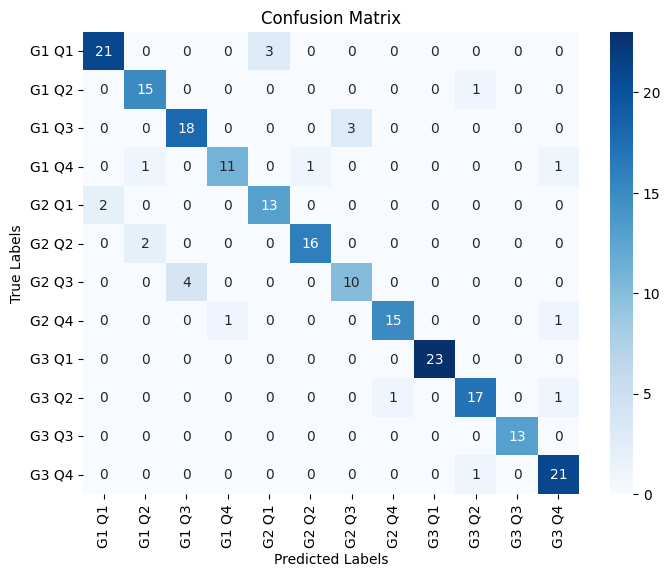

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you already have the confusion matrix
conf_matrix_ann = confusion_matrix(y_test_encoded1, y_prediction_ann_categorical1)

# Display the confusion matrix with a heatmap
custom_y_labels = ["G1 Q1", "G1 Q2", "G1 Q3", "G1 Q4", "G2 Q1","G2 Q2","G2 Q3","G2 Q4","G3 Q1","G3 Q2","G3 Q3","G3 Q4"]
custom_x_labels = ["G1 Q1", "G1 Q2", "G1 Q3", "G1 Q4", "G2 Q1","G2 Q2","G2 Q3","G2 Q4","G3 Q1","G3 Q2","G3 Q3","G3 Q4"]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann, annot=True, fmt="d", cmap="Blues", xticklabels=custom_x_labels, yticklabels=custom_y_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
ann_grid(d2)

<ipython-input-42-1c4b4c4f1ec1>:45: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_classifier = KerasClassifier(build_fn=create_ann_model, epochs=100, batch_size=32, verbose=0)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=32, optimizer=adam; total time=   6.3s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=32, optimizer=adam; total time=   3.4s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=32, optimizer=adam; total time=   6.0s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=32, optimizer=rmsprop; total time=   3.3s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=32, optimizer=rmsprop; total time=   3.2s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=32, optimizer=rmsprop; total time=   3.7s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=64, optimizer=adam; total time=   6.3s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=64, optimizer=adam; total time=   3.4s
[CV] END activation=relu, neurons_layer1=64, neurons_layer2=64, optimizer=adam; total time=   6.1s
[CV] END activation=relu, neurons_layer

# **Graph**

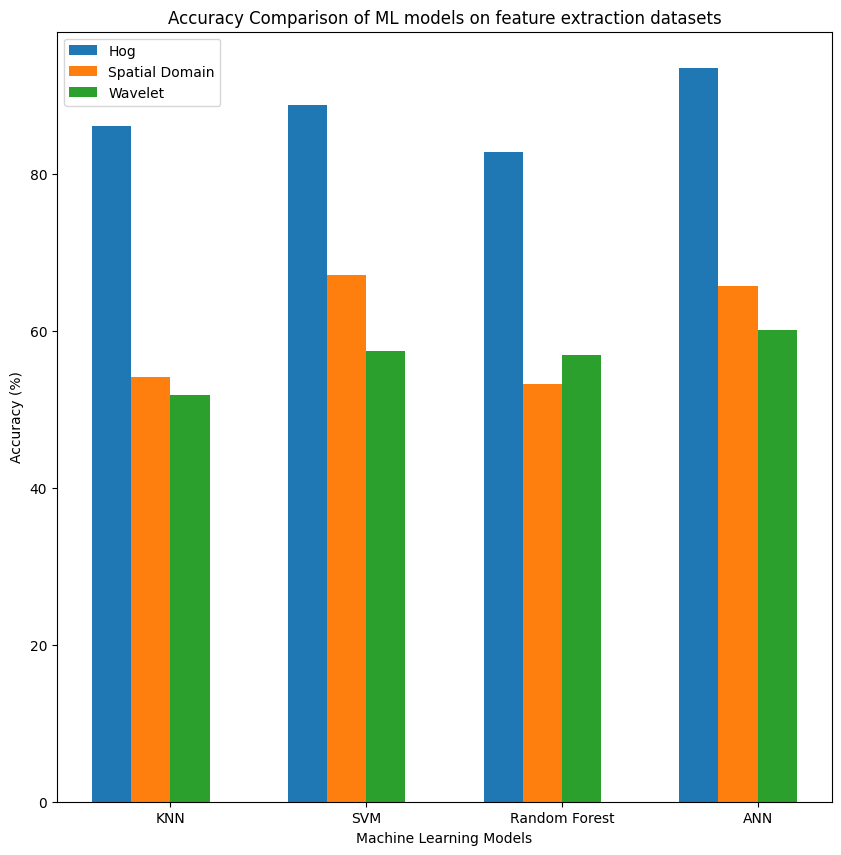

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Given accuracy values
accuracy_values = [
    [86.11, 54.16, 51.85], # KNN
    [88.88, 67.12, 57.41], # SVM
    [82.87, 53.24, 56.95], # RFC
    [93.51, 65.74, 60.18] # ANN

    # Hog, Spatial, Wavelet
]

# Transpose the accuracy values for plotting
accuracy_array = np.array(accuracy_values).T

# Plotting the graph
width = 0.2
x = np.arange(len(accuracy_array[0]))

fig, ax = plt.subplots(figsize=(10, 10))

for i, dataset_name in enumerate(['Hog','Spatial Domain','Wavelet']):
    ax.bar(x + i * width, accuracy_array[i], width=width, label=dataset_name)

ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(['KNN', 'SVM', 'Random Forest', 'ANN'])
ax.set_xlabel('Machine Learning Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy Comparison of ML models on feature extraction datasets')
ax.legend()
plt.show()